![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)
bikes['hour'] = bikes.index.hour
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [3]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

*** El recuento de alquileres es generalmente bajo en invierno y alcanza su punto máximo en verano. La temporada puede ser uno de los factores determinantes que afectan el número de alquileres de bicicletas. ***


In [4]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

***ANALISIS Y HALLAZGOS***
* El recuento de alquiler de bicicletas tiene picos al rededor de las 8 am y alrededor de las 12:00 p. m. y 5 de la tarde.*  
* El pico máximo de demanda es alrededor de las 4 a 5 de la tarde, posiblemente debido a que la gente ha terminado de trabajar y usa las bicletas para ir a casa.*

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

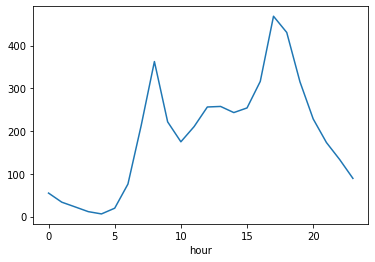

In [5]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

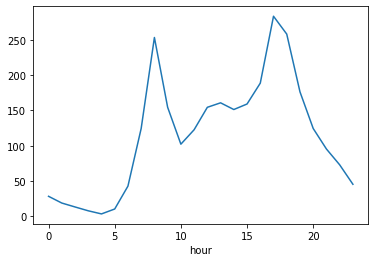

In [6]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
"Invierno"
bikes1=bikes[bikes.season==1]
bikes1.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

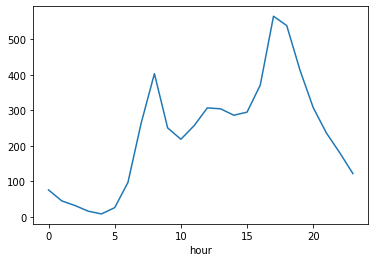

In [7]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
"Verano"
bikes3=bikes[bikes.season==3]
bikes3.groupby('hour').total.mean().plot()

***ANALISIS Y HALLAZGOS***
* El invierno muestra el número más bajo de alquileres y el verano el más alto. 
* Podemos ver una estacionalidad similar en el alquiler de las bicicletas  de acuerdo con las horas en invierno y en verano. * 
* Se observan los mismos picos al rededor de las 8, 12 y 5 de la tarde. *
* El recuento de alquiler de bicicletas tiene picos al rededor de las 8 am y alrededor de las 12:00 p. m. y 5 de la tarde. El pico máximo de demanda es alrededor de las 4 a 5 de la tarde, posiblemente debido a que la gente ha terminado de trabajar y necesita transporte para ir a casa.*


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [8]:
RLbikes=bikes
RLbikes['season'] = RLbikes['season'].replace({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

RLbikes=createDummies(RLbikes, 'season')
feature_cols=['season_Summer', 'season_Fall', 'season_Winter','hour']
X = RLbikes[feature_cols]
y = RLbikes['total'].astype(int)

linmod=LinearRegression()
linmod.fit(X,y)
lin_train=linmod.fit(X,y)
intercepto=linmod.intercept_
slope=linmod.coef_

preds = linmod.predict(X= X)


print('Los coeficientes estimados son:')
print(list(zip(feature_cols, linmod.coef_)))
print('El intercepto es:')
print(linmod.intercept_)

MSE=np.average(np.square(preds-y))
print('El valor del MSE es:')
print(MSE)
print('El valor del R^2 es:')
print(linmod.score(X, y))

residuos=preds-y


Los coeficientes estimados son:
[('season_Summer', 100.31723191606473), ('season_Fall', 119.46754994593223), ('season_Winter', 84.08311787296718), ('hour', 10.54520609406988)]
El intercepto es:
-6.430262462305478
El valor del MSE es:
25480.694694371625
El valor del R^2 es:
0.22339339904452493


**INTERPRETACION:**
    
* El modelo es capaz de explicar el 22.33% de la variabilidad observada en el peso de los libros (R-squared: 0.22339). *
* Manteniendo las demás variables constantes, por cada unidad que se incrementa el número de horas, el uso de las bicicletas aumenta en promedio 10.544 unidades. *
* En Summer (verano) el número de usuarios de bicicletas aumenta 100.31 unidades con relación a la categoría de referencia(Spring). *
* En Fall (otoño) el número de usuarios de bicicletas aumenta 119.46 unidades con relación a la categoría de referencia(Spring). *
* En Winter (invierno) el número de usuarios de bicicletas aumenta 84.083 unidades con relación a la categoría de referencia(Spring). *

**LIMITACIONES:**

* Se presume una relación lineal entre las características y la respuesta. *
* No se pueden aprender automáticamente las interacciones de las funciones. *
* No es competitivo con los mejores métodos de aprendizaje supervisado debido al alto sesgo. *
* Es sensible a los valores atípicos.*

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Separación de variables predictoras (X) y variable de interes (y)
bikes.total.describe()
Abikes=bikes.reset_index()
Abikes['season'] = Abikes['season'].replace({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
Abikes=createDummies(Abikes, 'season')
feature_cols=['season_Fall','season_Spring', 'season_Summer', 'season_Winter', 'hour']
X = Abikes[feature_cols]
y = Abikes['total'].astype(int)

In [ ]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

def gini_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    return gini_impurity_

def best_split(X, y, num_pct=100):
    features = range(X.shape[1])
    best_split = [0, 0, 0]  # j, split, gain
    for j in features:     # Para todas las varibles 
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
            if gain > best_split[2]:
                best_split = [j, split, gain]
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    j, split, gain = best_split(X, y, num_pct)     # Calcular la mejor división
    y_pred = int(y.mean() >= 0.5)                  # Guardar el árbol y estimar la predicción
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    if gain < min_gain:                            # Revisar el criterio de parada 
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    filter_l = X.iloc[:, j] < split                 # Continuar creando la partición
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]
    # Siguiente iteración para cada partición    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    return tree

# Aplicación de la función tree_grow
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=10, num_pct=10)
tree

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [10]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

RLbikes=bikes
RLbikes['season'] = RLbikes['season'].replace({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
RLbikes=createDummies(RLbikes, 'season')
feature_cols=['season_Spring', 'season_Summer', 'season_Fall', 'season_Winter','hour']
X = RLbikes[feature_cols]
y = RLbikes['total'].astype(int)

# Calibrar el criterio de parada de máxima profundidad (max_depth)
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
max_depth_range = range(1, 21)
r2_scores = []
for depth in max_depth_range:
    dtr = DecisionTreeRegressor(max_depth=depth, random_state=1)
    r2_scores.append(cross_val_score(dtr, X, y, cv=10, scoring='r2').mean())
print('# Mejor r2 (desempeño del modelo) y su correspondiente max_depth',sorted(zip(r2_scores, max_depth_range))[::-1][0])    

# Mejor r2 (desempeño del modelo) y su correspondiente max_depth (0.11028955174982276, 6)


In [19]:
# Entrenamiento  y validación
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)
arbol = DecisionTreeRegressor(max_depth=6, random_state=1)
arbol  = arbol.fit(XTrain, yTrain)
prediccion=arbol.predict(XTest)
MSEArbol=np.average(np.square(prediccion-yTest))
print("El MSE del modelo en la muestra de evaluación es igual a:")
print(MSEArbol)
arbol

El MSE del modelo en la muestra de evaluación es igual a:
13441.783978697407


DecisionTreeRegressor(max_depth=7, random_state=1)

***CONCLUSIONES***
* con el arbol del decisión el MSE en la muestra de evaluación es igual a: 13441.783978697407 y el MSE de la Regresión lineal fue de 25480.69 lo cual muestra que el arbol tuvo un mejor desempeño que la regresión lineal. *

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [24]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [35]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [61]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [40]:
# Celda 6
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
    
print('Mejor accuracy (desempeño del modelo) y su correspondiente max_depth')
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]



Mejor accuracy (desempeño del modelo) y su correspondiente max_depth


(0.6353333333333333, 2)

In [38]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

##Entrenamiento Modelo Arbol de Clasificación
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=2, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.645333,0.650943,0.638889,0.64486,0.645385


In [39]:
##Entrenamiento Modelo Arbol de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)  

#cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_RegLog = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_RegLog

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.614667,0.621918,0.600529,0.611036,0.614781


***CONCLUSIONES***
* El accuracy de los modelos fue: Logistic Regression	0.614667, Decision Tree Classifier 0.645333. Lo cual indica que en terminos de esta metrica el árbol de clasificación obtuvo mejores resultados. *


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [50]:
# Celda 7
# 100 árboles de decisión donde max_depth tome un valor de su elección

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import metrics

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)


roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

ModBaggingClassifier = pd.DataFrame([['Votacion_DecisionTreeClassifier1', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
ModBaggingClassifier

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Votacion_DecisionTreeClassifier1,0.646,0.654746,0.62963,0.641942,0.646132


In [49]:
# Celda 7
# 100 árboles de decisión donde min_samples_leaf tome un valor de su elección
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import metrics

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)


roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

ModBaggingClassifier = pd.DataFrame([['Votacion_DecisionTreeClassifier2', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
ModBaggingClassifier

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Votacion_DecisionTreeClassifier2,0.655333,0.65786,0.65873,0.658295,0.655306


In [54]:
# Celda 7
# 100 regresiones logísticas
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import metrics

clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)


roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

ModBaggingClassifier = pd.DataFrame([['Votacion_LogisticRegresion1', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
ModBaggingClassifier

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Votacion_LogisticRegresion1,0.618667,0.626374,0.603175,0.614555,0.618792


***CONCLUSIONES***
* El accuracy de los modelos fue: Votacion_LogisticRegresion1	0.618667, Votacion_DecisionTreeClassifier2	0.655333 y Votacion_DecisionTreeClassifier1	0.646. Se obtuvo un mejor desempeño con Votacion_DecisionTreeClassifier2 en el cual se modificó el parámetro min_samples_leaf=5.


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [84]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.98989898989899, 0.98989898989899)

In [85]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.9607843137254902, 0.9595959595959596)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

*** CONCLUSIONES***
* La metodología usada en el punto 7 consiste en hacer varias remuestras del conjunto de datos iniciales y 
el predictor final es el voto mayoritario de losestimadores en clasificación. *
* De acuerdo con los resultados se obtiene un mejor desempeño en la votación ponderada. *